<a href="https://colab.research.google.com/github/itsabbhii/Training-AIML/blob/main/DeepLearning/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!git clone https://github.com/itsabbhii/Training-AIML.git
%cd Training-AIML/DeepLearning

Cloning into 'Training-AIML'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 206 (delta 0), reused 3 (delta 0), pack-reused 202 (from 1)
Receiving objects: 100% (206/206), 33.07 MiB | 15.98 MiB/s, done.
Resolving deltas: 100% (74/74), done.
/content/Training-AIML/Training-AIML/DeepLearning/Training-AIML/DeepLearning


In [24]:
#importing libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [25]:
# list of datasets available in keras.datasets
from tensorflow.keras import datasets
print(dir(datasets))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'boston_housing', 'california_housing', 'cifar10', 'cifar100', 'fashion_mnist', 'imdb', 'mnist', 'reuters']


In [26]:
# Loading the datasset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
# x_train[0][5]

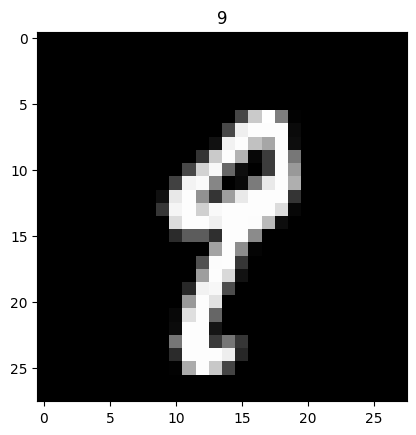

In [27]:
# Visualize a sample
temp = 78
plt.imshow(x_test[temp], cmap='gray')
plt.title(y_test[temp])
plt.show()

In [28]:
# Building the Model
model = Sequential([
    Input(shape=(28,28)),# Defining input shape
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [29]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train the Model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8639 - loss: 0.4715 - val_accuracy: 0.9569 - val_loss: 0.1559
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9612 - loss: 0.1353 - val_accuracy: 0.9643 - val_loss: 0.1246
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9736 - loss: 0.0876 - val_accuracy: 0.9697 - val_loss: 0.1019
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9812 - loss: 0.0645 - val_accuracy: 0.9729 - val_loss: 0.0917
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9836 - loss: 0.0533 - val_accuracy: 0.9738 - val_loss: 0.0844


In [30]:
# Testing the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9716 - loss: 0.0874
Test Accuracy: 0.9749000072479248


In [31]:
# make a prediction
predictions = model.predict(x_test)
print(predictions[0].argmax())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
7


In [35]:
model.save("neural.keras")

In [38]:
from PIL import Image
import numpy as np

# Load The trained model
newmodel = tf.keras.models.load_model("neural.keras")

img=Image.open('w9d4f.png')
img=img.resize((28,28))
img=img.convert('L')
img_array=np.array(img)
img_array=img_array.reshape(1,28,28,1)

predictions = newmodel.predict(img_array)
print(predictions[0].argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
6
